# Applied Machine Learning: Assignment \#12 - updated

### Sheetal Parikh
EN.605.631.81<br>
April 27, 2021
***
***

*Credit card fraud costs about 1% to the banks, an amount which customers (us) eventually pay. Let's find those anomalies which might reveal fraud. Download the popular credit card dataset from Kaggle.*


## Problem 1 & 2
*Pre-process the dataset, and then apply normalization or standardization, list number of rows and columns, check sanity.*

*Check the class balance and pick an evaluation metric.*

In [1]:
# imports for notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import datasets, svm, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import os 

#checking current directory
#print(os.getcwd() + "\n")

# change the current directory 
# to specified directory 
os.chdir(r"C:\Users\Sheetal\Documents\Sheetal\datasets") 

#Read in file
relative_path1 = 'creditcard.csv'

df_org = pd.read_csv(relative_path1)

# Sanity check
print(f'Credit Card Fraud Detection Data: N rows={len(df_org)}, M columns={len(df_org.columns)}')

#print first few rows to visualize dataset
df_org.head()

Credit Card Fraud Detection Data: N rows=284807, M columns=31


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# Print some info about datatypes of dataset
print(df_org.dtypes)

print("")
print(f'Column Names:')

#printing column names
print(df_org.columns)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Column Names:
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [3]:
df_org.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We can see that there are no null values and all the variables are numerical so no one-hot encoding will be required.  The target variable will be Class in which 0 equals no fraud and 1 equals fraud.  We do not know what the variables V1 to V28 mean.  We can look at a heatmap to see if there are any obvious correlations between the features and target.

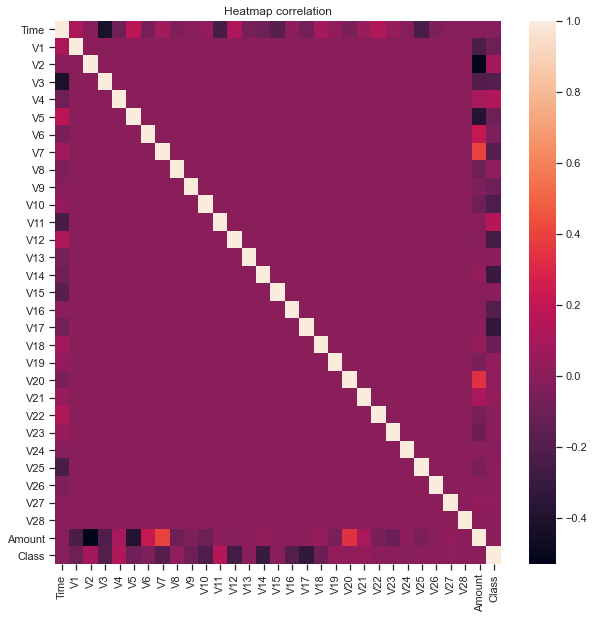

In [4]:
# plotting correlation heatmap 

plt.figure(figsize=(10, 10))
sns.heatmap(df_org.corr())

plt.title('Heatmap correlation')
plt.show()

As per the heatmap there are not many obvious correlations.  I may later drop the Time variable because I don't think the number of seconds between transactions would be important.  Also,I was having many issues running GridSearchCV and especially with the SVC model. Therefore, I will drop some of the variables that appear to not have much of a correlation with the target Class.  I will drop the following variables: Time, V6, V8, V13, V15, V19, V20, V21, V22, V23, V24, V25, V26, V27 and V28.

In [5]:
df_org.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


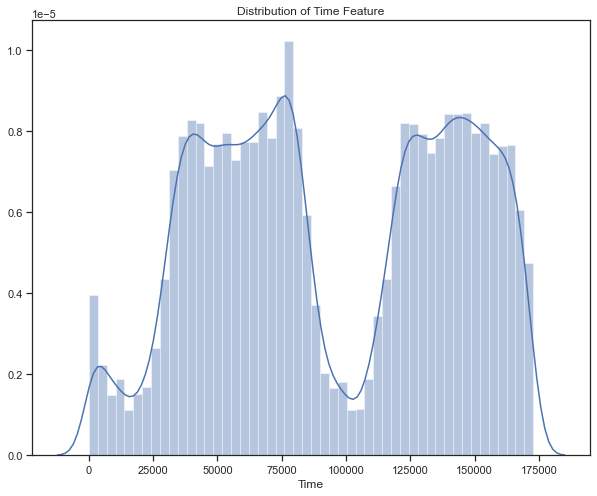

In [6]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df_org.Time)

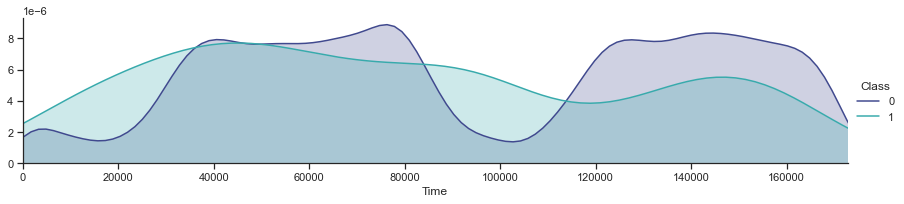

In [7]:
#Class vs Time

p = sns.FacetGrid(df_org, hue = 'Class', aspect = 4, palette = "mako")
p.map(sns.kdeplot, 'Time' , shade = True)
p.set(xlim = (0, df_org['Time'].max()))
p.add_legend()

The graphs above also show that the time variable does not have any obvious patterns towards whether a transaction was fraudulent so it is a features I will drop.

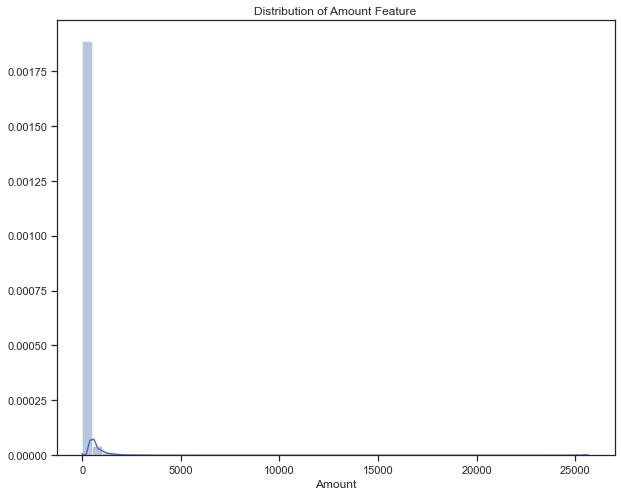

In [8]:
#visualizations of amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount Feature')
sns.distplot(df_org.Amount)

The amount feature is overwhelmingly skewed to the left.  This makes sense since the dataset primarily includes nonfraudulent transactions.

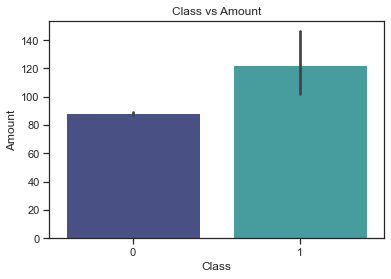

In [9]:
#plotting Amount vs Class

sns.barplot(x="Class", y="Amount", data=df_org, palette = "mako")
plt.title('Class vs Amount')
plt.show()

We can see that fraudlent transactions have a greater transaction amount.

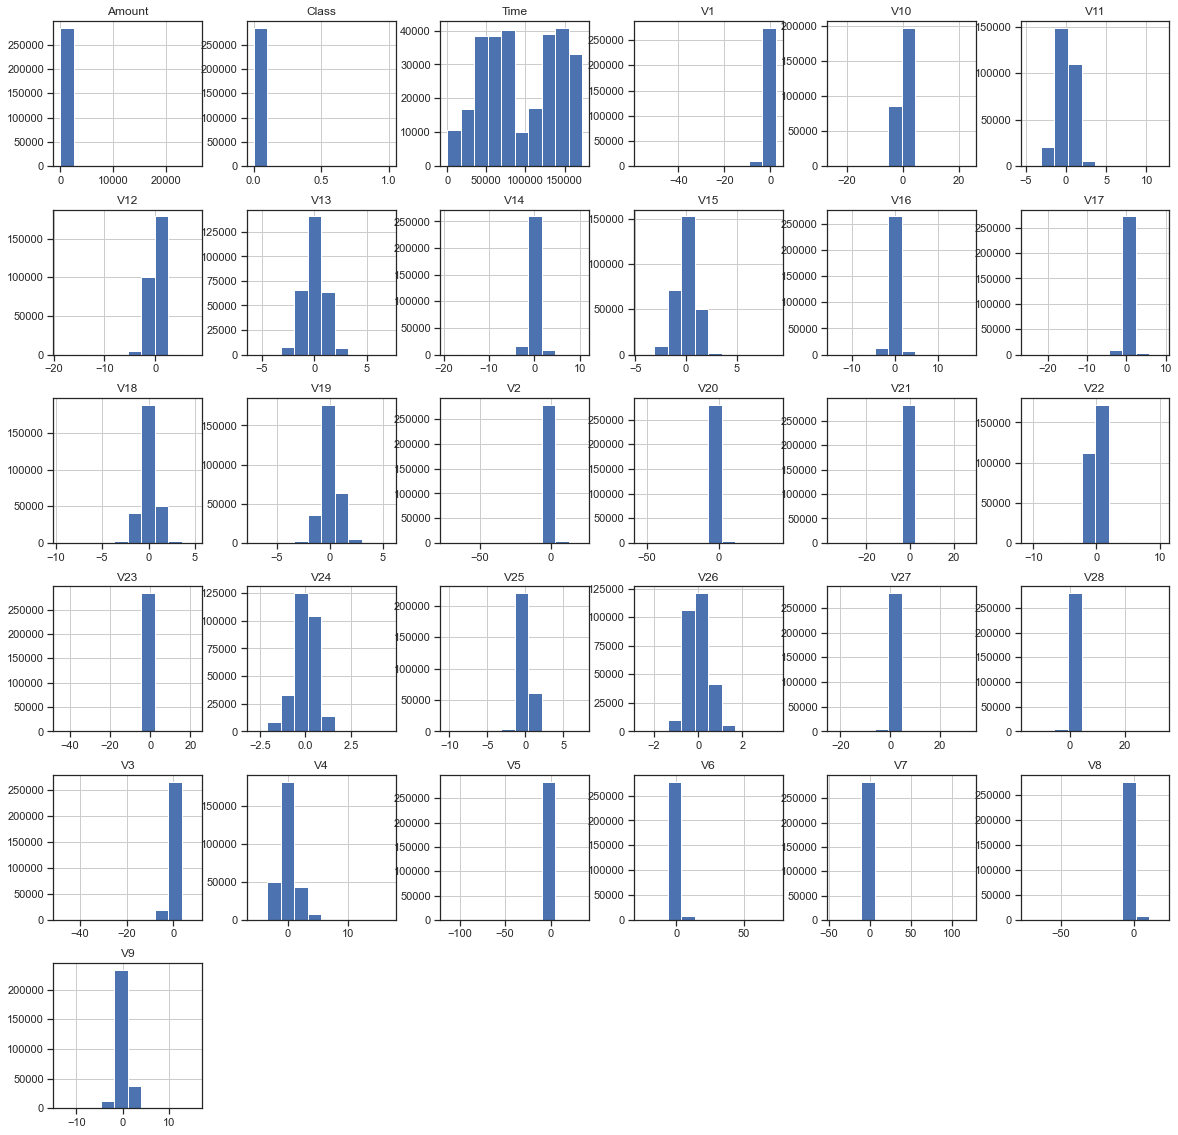

In [10]:
df_org.hist(figsize = (20, 20))
plt.show()

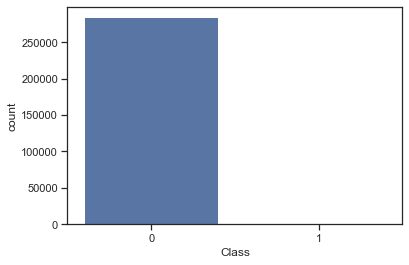

In [11]:
#checking class balance
sns.countplot(x="Class", data=df_org)

We can see that we have a very imbalanced dataset.  We can take a closer look at exactly how many fraudlent vs nonfraudulent transactions we have.

In [12]:
totalcases = len(df_org)
nonfraudulent = len(df_org[df_org.Class == 0])
fraudulent = len(df_org[df_org.Class == 1])
percent_fraud = round(fraudulent/nonfraudulent*100, 2)

print(f'Fraudulant Transactions: {fraudulent}')
print(f'NonFraudulent Transactions: {nonfraudulent}')
print(f'Percentage of Transactions that are fraudulent: {percent_fraud}')

Fraudulant Transactions: 492
NonFraudulent Transactions: 284315
Percentage of Transactions that are fraudulent: 0.17


In [13]:
#checking amount for nonfraudulent transactions

df_org[df_org.Class == 0].Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
#checking amount for fraudulent transactions

df_org[df_org.Class == 1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
#before standardizing amount - to compare when standardized
Amount = df_org['Amount']

Amount.head()

0    149.62
1      2.69
2    378.66
3    123.50
4     69.99
Name: Amount, dtype: float64

The amount variable greatly varies depending on the class. This will be a good feature to standardize.

In [16]:
#dropping features

df = df_org.copy()
df.drop(columns='Time', inplace=True)
df.drop(columns='V6', inplace=True)
df.drop(columns='V8', inplace=True)
df.drop(columns='V13', inplace=True)
df.drop(columns='V15', inplace=True)
df.drop(columns='V19', inplace=True)
df.drop(columns='V20', inplace=True)
df.drop(columns='V21', inplace=True)
df.drop(columns='V22', inplace=True)
df.drop(columns='V23', inplace=True)
df.drop(columns='V24', inplace=True)
df.drop(columns='V25', inplace=True)
df.drop(columns='V26', inplace=True)
df.drop(columns='V27', inplace=True)
df.drop(columns='V28', inplace=True)
df.head()

,V1,V2,V3,V4,V5,V7,V9,V10,V11,V12,V14,V16,V17,V18,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,69.99,0


In [17]:
#standardization
#from sklearn.preprocessing import StandardScaler

df2 = df.copy()

scaler = StandardScaler()

#adding column for standardized amount
df2['Standardized_Amount'] = scaler.fit_transform(df2['Amount'].values.reshape(-1, 1))

#dropping original amount column
df2 = df2.drop(['Amount'], axis=1)

#checking standardized amount column
standardizedAmount = df2['Standardized_Amount']
standardizedAmount.head()

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
Name: Standardized_Amount, dtype: float64

We can see how that the Standardized_Amount column now has standardized values.

In [18]:
df2.head()

,V1,V2,V3,V4,V5,V7,V9,V10,V11,V12,V14,V16,V17,V18,Class,Standardized_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0,-0.073403


I checked class the balance above.  There are only 492 fraudulent case vs 284,315 non fradulent cases.  Since the dataset is so imbalanced the metric I want to use is the F1 score.  I think F1 is a good metric since we want to use a measure that shows that both classes are being classified correctly.  Classifying the fraudulent cases are more important but I also want to make sure the nonfraudulent cases are being classified correclty since there are so many instances.  The accuracy metric will be very misleading since there are so few fraudlent transactions. Any model would probably have a high accuracy since most nonfraudulent transactions will be classified as nonfraudulent.  As per the kaggle problem description, the Area Under the Precision-Recall Curve (AUPRC) was a recommended evaluaton metric due to the class imbalance.  I want to compare the AUPRC vs Accuracy vs. F1 Score. 

***
## Problem 3
*Split the dataset 50-50 for training and testing. Then run DecisionTreeClassifier, SVC, MLPClassifier without any tree pruning or regularization. Report the classification performance*

In [19]:
#building multiple models for comparison

models = ["SVC_Linear", "Decision_Tree", "MLP"]

classifiers = [
    svm.SVC(kernel="linear", gamma='auto'),
    DecisionTreeClassifier(),
    MLPClassifier()]

In [20]:
#splitting of data

# Preparing the input X matrix and target y vector
X = df2.loc[:, df2.columns != 'Class'].values
y = df2.loc[:, df2.columns == 'Class'].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=None)

In [21]:
%%time

#finding accuracy, f1-score, and ROC_AUC
accuracies = []
f1score = []
roc_auc = []

for model, clf in zip(models, classifiers):
    model_ = clf.fit(X_train, y_train)
    y_pred = model_.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auroc = roc_auc_score(y_test, y_pred)
    accuracies.append(np.mean(accuracy))
    f1score.append(np.mean(f1))
    roc_auc.append(np.mean(auroc))

#scores
training_50 = pd.DataFrame()
training_50['Model'] = models
training_50['Accuracy'] = accuracies
training_50['F1_Score'] = f1score
training_50['ROC_AUC'] = roc_auc
training_50

Wall time: 2min 36s


,Model,Accuracy,F1_Score,ROC_AUC
0,SVC_Linear,0.999445,0.827133,0.893652
1,Decision_Tree,0.999270,0.786008,0.897723
2,MLP,0.999389,0.811280,0.889464


As expected, accuracy is not a good metric to use for such an imbalanced dataset. The accuracy is already 99% for all classifiers.  I think F1-Score will be most interesting to use to see the impact of regularization since currently since F1-score is the lowest compared to Accuracy and ROC_AUC.  I tried running 10 fold cross validation but the SVC model was taking more than an hour to run. I am using the linear kernel because it was taking a shorter time to run compared to the rbf model. Using gamma = auto also helped speed up juputer notebook.

***
## Problem 4
*Run DecisionTreeClassifier, SVC, MLPClassifier with tree pruning and regularization (Hint: Use GridSearchCV to optimize the regularization parameters). Report the classification performance.*

In [22]:
#function for finding best parameter using GridSearchCV
def bestparameter(model_ , tuned_parameter, score_):    
    clf = GridSearchCV(model_, tuned_parameter, scoring=score_, n_jobs = -1)
    clf.fit(X_train, y_train)

    print("Best parameters:")
    print(clf.best_params_)
    print()
    print("Best Score:")
    print(clf.best_score_)
    print()
    print()

In [23]:
#%%time
##MLPClassifier - regularization parameter is alpha
tuned_parameters_svc = {'C': [1, 5, 10, 25, 50]}
tuned_parameters_mlp = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}

model_mlp = MLPClassifier()
model_svc = svm.SVC(kernel="linear",gamma='auto')

score = 'f1'

In [24]:
%%time
bestparameter(model_mlp, tuned_parameters_mlp, score)

Best parameters:
{'alpha': 0.01}

Best Score:
0.8159197385561165


Wall time: 7min 28s


The best alpha value for the MLP classifier is 0.01 using GridSearchCV.  This is not an improvement from the score when running the MLP classifier without regularization.

In [25]:
#%%time
#bestparameter(model_svc, tuned_parameters_svc, score)

In [26]:
%%time
# Classifier function from module 3 notebook
def svm_train_test(_X_tr, _X_ts, _y_tr, _y_ts, c):
    # Creating svm RBF classifier
    clf = svm.SVC(kernel="linear",gamma='auto', C = c)
    # Training on training data
    model = clf.fit(_X_tr, _y_tr)
    # Testing on training data
    y_pred = clf.predict(_X_ts)
    # Return f1 score
    return f1_score(_y_ts, y_pred)

svm_train_test(X_train, X_test, y_train, y_test, 1)

Wall time: 1min 47s


0.8271334792122539

In [27]:
%%time
svm_train_test(X_train, X_test, y_train, y_test, 5)

Wall time: 5min 43s


0.8271334792122539

In [28]:
%%time
svm_train_test(X_train, X_test, y_train, y_test, 10)

Wall time: 12min 29s


0.8271334792122539

GridsearchCV took once about an hour to run for the SVC model and then took more than 2 hours to run. I just tested out the F1-score using the C values of 1,5,10.  The F1 scores were all similar so I'm going to use a C value of 5 since 1 is the default and 5 took less time to run than 10.

In [29]:
#Decision Tree Pruning - method from : https://ranvir.xyz/blog/practical-approach-to-tree-pruning-using-sklearn/
dt = DecisionTreeClassifier()
path = dt.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 4.67177572e-06, 4.67998515e-06, 6.82725941e-06,
        6.95730245e-06, 6.98477143e-06, 7.01088667e-06, 7.01453869e-06,
        7.01503184e-06, 7.01559546e-06, 7.01766494e-06, 7.02114596e-06,
        7.02217947e-06, 7.02585632e-06, 7.02601068e-06, 7.02661293e-06,
        7.03330196e-06, 7.03347172e-06, 7.03935147e-06, 7.04237042e-06,
        7.05062877e-06, 9.83087340e-06, 1.26401831e-05, 1.27678618e-05,
        1.35685582e-05, 1.87261972e-05, 2.60064406e-05, 2.62166761e-05,
        2.80892959e-05, 2.97367619e-05, 3.93964622e-05, 4.49428734e-05,
        4.66074243e-05, 6.70706365e-05, 1.05225442e-04, 1.28992044e-04,
        1.79553428e-04, 1.87256422e-03]),
 'impurities': array([0.00000000e+00, 1.40153272e-05, 2.80552826e-05, 6.90188391e-05,
        8.29334440e-05, 9.69029869e-05, 1.38968307e-04, 1.52997384e-04,
        1.67027448e-04, 2.09121021e-04, 2.65262340e-04, 3.63558384e-04,
        3.91647102e-04, 4.05698814e-04, 4.33802857e-04, 4.47856083

In [30]:
#alpha values
ccp_alphas = path.ccp_alphas

In [31]:
#finding optimal alpha values
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'F1 Scores')

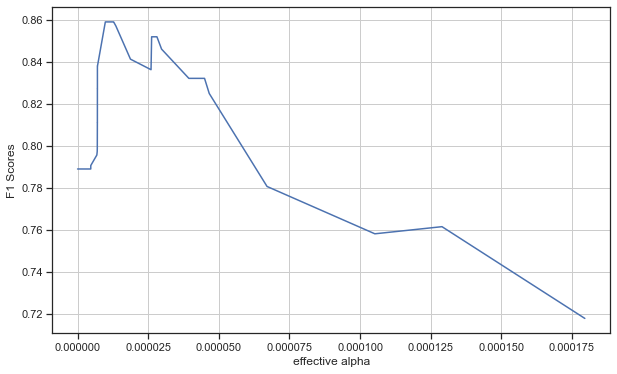

In [32]:
#plotting alpha values vs. f1 score
f1_scores = [f1_score(y_test, clf.predict(X_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], f1_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("F1 Scores")

Since GridSearchCV was taking very long for me, I found another method for evaluating the best ccp_alpha value for the decision tree.  As per the graph above an ideal ccp_alpha value appears to be about be about 0.000020.

In [33]:
%%time

#regularized
classifiers2 = [
    svm.SVC(kernel="linear", gamma='auto', C = 5),
    DecisionTreeClassifier(ccp_alpha = 0.00002),
    MLPClassifier(alpha = 0.01)]

accuracies = []
f1score = []
roc_auc = []

for model, clf in zip(models, classifiers2):
    model_ = clf.fit(X_train, y_train)
    y_pred = model_.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auroc = roc_auc_score(y_test, y_pred)
    accuracies.append(np.mean(accuracy))
    f1score.append(np.mean(f1))
    roc_auc.append(np.mean(auroc))

#scores

training_50Reg = pd.DataFrame()
training_50Reg['Model'] = models
training_50Reg['Accuracy'] = accuracies
training_50Reg['F1_Score'] = f1score
training_50Reg['ROC_AUC'] = roc_auc
training_50Reg

Wall time: 3min 17s


,Model,Accuracy,F1_Score,ROC_AUC
0,SVC_Linear,0.999445,0.827133,0.893652
1,Decision_Tree,0.999508,0.840909,0.885364
2,MLP,0.999347,0.791011,0.866565


After running the regularized models there appears to be signficiant improvement to the F1-Score using the decision tree.  The SVC and MLP model are very similar but have a slightly reduced F1 Score.

***
## Problem 5
*Attempt avoiding overfitting while the training is reduced. Add splits 40-60, 30-70, 20-80, 10-90, 5-95 and repeat step 3 and step 4.*

In [34]:
#splitting training testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.60, random_state=None)
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.70, random_state=None)
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size=0.80, random_state=None)
X5_train, X5_test, y5_train, y5_test = train_test_split(X, y, test_size=0.90, random_state=None)
X6_train, X6_test, y6_train, y6_test = train_test_split(X, y, test_size=0.95, random_state=None)

In [35]:
def eval_classifier(models,classifier,X_train, y_train, X_test,y_test):
    accuracies = []
    f1score = []
    roc_auc = []

    for model, clf in zip(models, classifier):
        model_ = clf.fit(X_train, y_train)
        y_pred = model_.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auroc = roc_auc_score(y_test, y_pred)
        accuracies.append(np.mean(accuracy))
        f1score.append(np.mean(f1))
        roc_auc.append(np.mean(auroc))
#scores
    display = pd.DataFrame()
    display['Model'] = models
    display['Accuracy'] = accuracies
    display['F1_Score'] = f1score
    display['ROC_AUC'] = roc_auc
    return display

### 40-60 Split

#### Not Regularized

In [36]:
#40-60 not regularized
training_40 = eval_classifier(models,classifiers,X2_train,y2_train,X2_test,y2_test)
training_40

,Model,Accuracy,F1_Score,ROC_AUC
0,SVC_Linear,0.999415,0.816850,0.895270
1,Decision_Tree,0.999058,0.720971,0.868539
2,MLP,0.999421,0.818349,0.895273


#### Regularized

In [37]:
#40-60 regularized
training_40Reg = eval_classifier(models,classifiers2,X2_train,y2_train,X2_test,y2_test)
training_40Reg

,Model,Accuracy,F1_Score,ROC_AUC
0,SVC_Linear,0.999415,0.816850,0.895270
1,Decision_Tree,0.999386,0.795322,0.861623
2,MLP,0.999491,0.837989,0.898848


### 30-70 Split

#### Not Regularized

In [38]:
#30-70 not regularized
training_30 = eval_classifier(models,classifiers,X3_train,y3_train,X3_test,y3_test)
training_30

,Model,Accuracy,F1_Score,ROC_AUC
0,SVC_Linear,0.999353,0.809453,0.901604
1,Decision_Tree,0.999057,0.728324,0.869253
2,MLP,0.999428,0.825688,0.895786


#### Regularized

In [39]:
#30-70 regularized
training_30Reg = eval_classifier(models,classifiers2,X3_train,y3_train,X3_test,y3_test)
training_30Reg

,Model,Accuracy,F1_Score,ROC_AUC
0,SVC_Linear,0.999353,0.809453,0.901604
1,Decision_Tree,0.999373,0.804382,0.876730
2,MLP,0.999423,0.825493,0.898711


### 20-80 Split

#### Not Regularized

In [40]:
#20-80 not regularized
training_20 = eval_classifier(models,classifiers,X4_train,y4_train,X4_test,y4_test)
training_20

,Model,Accuracy,F1_Score,ROC_AUC
0,SVC_Linear,0.999399,0.815115,0.877414
1,Decision_Tree,0.998903,0.684343,0.838484
2,MLP,0.999333,0.786517,0.849930


#### Regularized

In [41]:
#20-80 regularized
training_20Reg = eval_classifier(models,classifiers2,X4_train,y4_train,X4_test,y4_test)
training_20Reg

,Model,Accuracy,F1_Score,ROC_AUC
0,SVC_Linear,0.999399,0.815115,0.877414
1,Decision_Tree,0.999083,0.726797,0.847309
2,MLP,0.999443,0.831788,0.892410


### 10-90 Split

#### Not Regularized

In [42]:
#10-90 not regularized
training_10 = eval_classifier(models,classifiers,X5_train,y5_train,X5_test,y5_test)
training_10

,Model,Accuracy,F1_Score,ROC_AUC
0,SVC_Linear,0.999411,0.815177,0.888909
1,Decision_Tree,0.998912,0.686869,0.857170
2,MLP,0.999243,0.734247,0.813018


#### Regularized

In [43]:
#10-90 regularized
training_10Reg = eval_classifier(models,classifiers2,X5_train,y5_train,X5_test,y5_test)
training_10Reg

,Model,Accuracy,F1_Score,ROC_AUC
0,SVC_Linear,0.999411,0.815177,0.888909
1,Decision_Tree,0.998818,0.668852,0.857123
2,MLP,0.999325,0.770861,0.839883


#### 5-95 Split

#### Not Regularized

In [44]:
#5-95 not regularized
training_5 = eval_classifier(models,classifiers,X6_train,y6_train,X6_test,y6_test)
training_5

,Model,Accuracy,F1_Score,ROC_AUC
0,SVC_Linear,0.998947,0.61642,0.741487
1,Decision_Tree,0.998987,0.66988,0.793105
2,MLP,0.999146,0.69404,0.776336


#### Regularized

In [45]:
#5-95 regularized
training_5Reg = eval_classifier(models,classifiers2,X6_train,y6_train,X6_test,y6_test)
training_5Reg

,Model,Accuracy,F1_Score,ROC_AUC
0,SVC_Linear,0.998947,0.615385,0.740434
1,Decision_Tree,0.999013,0.704319,0.835238
2,MLP,0.999157,0.713568,0.799508


The GridSearchCV was taking very long for SVC so I found the F1-Score using the ideal regularization parameters from Problem 4.

***
## Problem 6
*Plot everything you have on a single plot and comment about your results in terms of training size, regularization, etc.*

In [46]:
#adding column for training size

training_50['Training_Split'] = 0.50
training_50Reg['Training_Split'] = 0.50

training_40['Training_Split'] = 0.40
training_40Reg['Training_Split'] = 0.40

training_30['Training_Split'] = 0.30
training_30Reg['Training_Split'] = 0.30

training_20['Training_Split'] = 0.20
training_20Reg['Training_Split'] = 0.20

training_10['Training_Split'] = 0.10
training_10Reg['Training_Split'] = 0.10

training_5['Training_Split'] = 0.05
training_5Reg['Training_Split'] = 0.05


In [47]:
#check
training_40Reg

,Model,Accuracy,F1_Score,ROC_AUC,Training_Split
0,SVC_Linear,0.999415,0.816850,0.895270,0.4
1,Decision_Tree,0.999386,0.795322,0.861623,0.4
2,MLP,0.999491,0.837989,0.898848,0.4


In [48]:
training_40Reg.columns

Index(['Model', 'Accuracy', 'F1_Score', 'ROC_AUC', 'Training_Split'], dtype='object')

In [49]:
#SVC - not regularized
SVC_f1 = pd.concat([training_50.drop([1,2]),training_40.drop([1,2]),
                    training_30.drop([1,2]),training_20.drop([1,2]),
                    training_10.drop([1,2]),training_5.drop([1,2])], axis = 0)

SVC_f1 = SVC_f1.drop(['Accuracy', 'ROC_AUC'], axis = 1)

SVC_f1.reset_index(drop=True)

,Model,F1_Score,Training_Split
0,SVC_Linear,0.827133,0.50
1,SVC_Linear,0.816850,0.40
2,SVC_Linear,0.809453,0.30
3,SVC_Linear,0.815115,0.20
4,SVC_Linear,0.815177,0.10
5,SVC_Linear,0.616420,0.05


In [50]:
#SVC - regularized
SVC_f1_reg = pd.concat([training_50Reg.drop([1,2]),training_40Reg.drop([1,2]),
                    training_30Reg.drop([1,2]),training_20Reg.drop([1,2]),
                    training_10Reg.drop([1,2]),training_5Reg.drop([1,2])], axis = 0)

SVC_f1_reg = SVC_f1_reg.drop(['Accuracy', 'ROC_AUC'], axis = 1)

SVC_f1_reg.reset_index(drop=True)

,Model,F1_Score,Training_Split
0,SVC_Linear,0.827133,0.50
1,SVC_Linear,0.816850,0.40
2,SVC_Linear,0.809453,0.30
3,SVC_Linear,0.815115,0.20
4,SVC_Linear,0.815177,0.10
5,SVC_Linear,0.615385,0.05


In [51]:
#Decision Tree - not regularized
Dt_f1 = pd.concat([training_50.drop([0,2]),training_40.drop([0,2]),
                    training_30.drop([0,2]),training_20.drop([0,2]),
                    training_10.drop([0,2]),training_5.drop([0,2])], axis = 0)

Dt_f1 = Dt_f1.drop(['Accuracy', 'ROC_AUC'], axis = 1)

Dt_f1.reset_index(drop=True)

,Model,F1_Score,Training_Split
0,Decision_Tree,0.786008,0.50
1,Decision_Tree,0.720971,0.40
2,Decision_Tree,0.728324,0.30
3,Decision_Tree,0.684343,0.20
4,Decision_Tree,0.686869,0.10
5,Decision_Tree,0.669880,0.05


In [52]:
#Decision Tree - regularized
Dt_f1_reg = pd.concat([training_50Reg.drop([0,2]),training_40Reg.drop([0,2]),
                    training_30Reg.drop([0,2]),training_20Reg.drop([0,2]),
                    training_10Reg.drop([0,2]),training_5Reg.drop([0,2])], axis = 0)

Dt_f1_reg = Dt_f1_reg.drop(['Accuracy', 'ROC_AUC'], axis = 1)

Dt_f1_reg.reset_index(drop=True)

,Model,F1_Score,Training_Split
0,Decision_Tree,0.840909,0.50
1,Decision_Tree,0.795322,0.40
2,Decision_Tree,0.804382,0.30
3,Decision_Tree,0.726797,0.20
4,Decision_Tree,0.668852,0.10
5,Decision_Tree,0.704319,0.05


In [53]:
#MLP - not regularized
MLP_f1 = pd.concat([training_50.drop([0,1]),training_40.drop([0,1]),
                    training_30.drop([0,1]),training_20.drop([0,1]),
                    training_10.drop([0,1]),training_5.drop([0,1])], axis = 0)

MLP_f1 = MLP_f1.drop(['Accuracy', 'ROC_AUC'], axis = 1)

MLP_f1.reset_index(drop=True)

,Model,F1_Score,Training_Split
0,MLP,0.811280,0.50
1,MLP,0.818349,0.40
2,MLP,0.825688,0.30
3,MLP,0.786517,0.20
4,MLP,0.734247,0.10
5,MLP,0.694040,0.05


In [54]:
#MLP - regularized
MLP_f1_reg = pd.concat([training_50Reg.drop([0,1]),training_40Reg.drop([0,1]),
                    training_30Reg.drop([0,1]),training_20Reg.drop([0,1]),
                    training_10Reg.drop([0,1]),training_5Reg.drop([0,1])], axis = 0)

MLP_f1_reg = MLP_f1_reg.drop(['Accuracy', 'ROC_AUC'], axis = 1)

MLP_f1_reg.reset_index(drop=True)

,Model,F1_Score,Training_Split
0,MLP,0.791011,0.50
1,MLP,0.837989,0.40
2,MLP,0.825493,0.30
3,MLP,0.831788,0.20
4,MLP,0.770861,0.10
5,MLP,0.713568,0.05


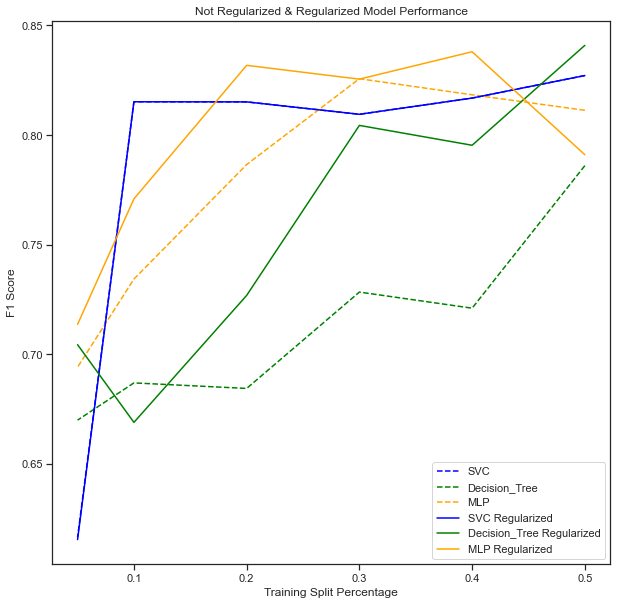

In [55]:
#Combined Plot

x = SVC_f1['Training_Split']


plt.figure(figsize=(10,10))

plt.plot(x, SVC_f1['F1_Score'], label = "SVC", linestyle = '--', color = 'blue')
plt.plot(x, Dt_f1['F1_Score'], label = "Decision_Tree", linestyle = '--', color = 'green' )
plt.plot(x, MLP_f1['F1_Score'], label = "MLP", linestyle = '--', color = 'orange')
plt.plot(x, SVC_f1_reg['F1_Score'], label = "SVC Regularized", color = 'blue')
plt.plot(x, Dt_f1_reg['F1_Score'], label = "Decision_Tree Regularized", color = 'green')
plt.plot(x, MLP_f1_reg['F1_Score'], label = "MLP Regularized", color = 'orange')

plt.title("Not Regularized & Regularized Model Performance")
plt.xlabel("Training Split Percentage")
plt.ylabel("F1 Score")               
plt.legend()

plt.show()

As can be seen in the plot above, the performance of the models stabilize with a higher training size and with regularization. The F1-Scores began to increase with the increase in training size.  However, between the 40-60 and 50-50 split the F1-Score begins to level off. We can see how the training size should only be increased to a certain point because then you may just be overfitting the model, especially when you have an imbalanced dataset.  The main issue I faced with this assignment was the time it took to process to train the SVC model. At times, it took more than an hour for training.

***
## References

https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv

https://towardsdatascience.com/detecting-credit-card-fraud-using-machine-learning-a3d83423d3b8

https://www.aaai.org/Papers/Workshops/2000/WS-00-05/WS00-05-003.pdf

https://medium.com/codex/credit-card-fraud-detection-with-machine-learning-in-python-ac7281991d87

https://scikit-learn.org/stable/modules/model_evaluation.html

https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

https://scikit-learn.org/stable/auto_examples/svm/plot_svm_scale_c.html

https://ranvir.xyz/blog/practical-approach-to-tree-pruning-using-sklearn/

https://medium.com/usf-msds/choosing-the-right-metric-for-evaluating-machine-learning-models-part-2-86d5649a5428

Raschka, Sebastian. Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2, 3rd Edition (p. 46). Packt Publishing. Kindle Edition. 
